<a href="https://colab.research.google.com/github/djarnis2/E25_NLP_text_classification/blob/main/E25_NLP_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification
 - In this notebook we will create a deep learning classifier for text classification starting from raw text. We'll use the IMDB sentiment classification dataset (unprocessed version).
 - 1\) Load data
 - 2\) Preprocessing
 - 3\) Data exploration
 - 4\) Prepare input samples for input to neural networks
 - 5\) Download and prepare pretrained word embeddings
 - 6\) Train classifier
 - 7\) Test on test set and analyze the results

In [1]:
!pip install --upgrade numpy pandas tensorflow matplotlib scipy --user

In [124]:
import os

print("Current working directory:")
print(os.getcwd())

print("\nFiles in this folder:")
print(os.listdir())


Current working directory:
/content

Files in this folder:
['.config', 'drive', 'IMDB_multifilter_cnn_classifier.h5', 'IMDB_blstm_classifier.h5', 'IMDB_gru_classifier.h5', 'IMDB_text_classifier.h5', 'IMDB_simple_cnn_classifier.h5', 'IMDB_lstm_classifier.h5', 'cc.en.300.bin', 'cc.en.300.bin.gz', 'sample_data']


In [126]:
from google.colab import drive
drive.mount('/content/drive')

import os

print(os.listdir("/content/drive/MyDrive"))
print(os.listdir("/content/drive/MyDrive/Colab Notebooks"))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['Colab Notebooks', 'Alt muligt rod', 'VUC', 'JOSEFINE', 'Jonas', 'Aktier', 'Python Algebra.ipynb', 'Unavngivet tegning.gdraw', 'Unavngivet diagram (1).drawio', 'Unavngivet diagram.drawio', 'Kopi af PackageUML.drawio', '11.1.2 opg1a)#=12 b F4=12j C81=I9 D)F8I=I9J.pdf', '11.1.2 opg1a)#=12 b F4=12j C81=I9 D)F8I=I9J.gdoc', 'Discrete Mathematics and Its Applications.pdf.gdoc', 'Untitled0.ipynb', 'DeepLearning', 'Association Technique - Ideation Tools for EiTI 11.gdoc', 'lab-tsc-checkpoint.ipynb', 'Trees', 'tree2diagram.drawio', 'tree4diagram.drawio', 'tree5diagram.drawio', 'Data_flow_ACME_Health.drawio']
['E25_NLP_text_classification.ipynb', 'Kopi af Python crash course.ipynb', 'Untitled0.ipynb', 'Kopi af Numpy intro.ipynb', 'testingDLfromMITTutorial.ipynb', 'Deep_Learning_Assignment1_2_LinClassify.ipynb', 'Deep_Learning_Assignment1_1_kNN.ipynb', 'Deep_Learning_A

In [127]:
import nbformat

path = "/content/drive/MyDrive/Colab Notebooks/E25_NLP_text_classification.ipynb"

nb = nbformat.read(path, as_version=4)

# Fjern widgets på notebook-niveau
nb.metadata.pop("widgets", None)

# (valgfrit) fjern evt. widget-metadata på celler
for cell in nb.cells:
    cell.metadata.pop("widgets", None)

nbformat.write(nb, path)
print("Renset notebook gemt:", path)


Renset notebook gemt: /content/drive/MyDrive/Colab Notebooks/E25_NLP_text_classification.ipynb


## Load data

In [4]:
# Load the IMDB data from your local directory

# Mount drive if using Colab
from google.colab import drive
drive.mount('/content/drive')

def load_data(path):
    samples=[]
    labels=[]
    with open(path, encoding='utf8') as f:
        for line in f:
            labels.append(int(line[0])) #First char is the label (0=Negative, 1 = positive)
            samples.append(line[2:-2]) #Append the text except for '\n'-linebreaks
    return labels, samples
#Load x_train and y_train
#path = "/content/drive/MyDrive/Colab Notebooks/imdb_dataset_train.txt"
train_path = "/content/drive/MyDrive/Colab Notebooks/imdb_dataset_train.txt"
test_path  = "/content/drive/MyDrive/Colab Notebooks/imdb_dataset_test.txt"

y_train, x_train = load_data(train_path)
y_test,  x_test  = load_data(test_path)

print('Number of training samples: {}\nNumber of test samples: {}'.format(len(y_train), len(y_test)))

#y_train, x_train = load_data('Colab Notebooks/imdb_dataset_train.txt')
#Load x_test and y_test
#y_test, x_test = load_data('Colab Notebooks/imdb_dataset_test.txt')
#print('Number of training samples: {}\nNumber of test samples: {}'.format(len(y_train), len(y_test)))
#print(x_train[1])

Mounted at /content/drive
Number of training samples: 25000
Number of test samples: 25000


In [6]:
!ls "/content/drive/MyDrive/Colab Notebooks"


 Deep_Learning_Assignment1_1_kNN.ipynb
 Deep_Learning_Assignment1_2_LinClassify.ipynb
 Deep_Learning_Assignment1_3_NeuralNet.ipynb
 demo.ipynb
 E25_Exercises_Introduction_to_NLP_and_Word_Embeddings.ipynb
 E25_NLP_text_classification.ipynb
 imdb_dataset_test.txt
 imdb_dataset_train.txt
'Kopi af Numpy intro.ipynb'
'Kopi af Python crash course.ipynb'
 lab-tsc-checkpoint.ipynb
 testingDLfromMITTutorial.ipynb
 Untitled0.ipynb


In [7]:
print(x_train[1])

Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school, work, or vote for the matter. Most people think of the homeless as just a lost cause while worrying about things such as racism, the war on Iraq, pressuring kids to succeed, technology, the elections, inflation, or worrying if they'll be next to end up on the streets.<br /><br />But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home, the entertainment sets, a bathroom, pictures on the wall, a computer, and everything you once treasure to see what it's like to be homeless? That is Goddard Bolt's lesson.<br /><br />Mel Brooks (who directs) who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival (Jeffery Tambor) to see if he can live in the streets for thirty days without th

In [8]:
print(x_train[100])

I was prepared for a turgid talky soap opera cum travelogue, but was pleased to find a fast-paced script, an underlying moral, excellent portrayals from all the actors, especially Peter Finch, amazing special effects, suspense, and beautiful cinematography--there's even a shot of the majestic stone Buddhas recently destroyed by the Taliban. Not to mention Elizabeth Taylor at her most gloriously beautiful and sympathetic, before she gave in to the gaspy hysterics that marred her later work. All the supporting players round it out, and I do wonder who trained all those elephants.<br /><br />Speaking of the stone-Buddha sequence, you really can discern that it's Vivien Leigh in the long shots. Her shape and the way she moves is distinct from Taylor's. The only thing marring that sequence are the poorly done process shots, where the background moves by much too fast for horses at a walk.<br /><br />If you want a thought-provoking film that is beautiful to watch and never boring, spend a fe

## Preprocessing
 - Read through some samples - what do you see? Can we remove something to help our classifier?
 - Remember that you should only preprocess your data based on your findings of the training dataset. Why?

Answer: Because otherwise you get data leakage from the test set, and your test performance is no longer a valid, unbiased estimate of how well the model generalizes.

In [9]:
# Print some samples and read through.
# How many samples should we read before making conclusions?
for sample in x_train[0:3]:
    print(sample,"\n")

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't 

Homelessness (or Houselessness as George Carlin stated) has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going t

In [10]:
# Let's preprocess the text by removing special chars and string patterns
# For this we will use Regular expressions (Regex)
# There are many options when using Regex, and sometimes they can look quite confusing. They are, however, really efficient for preprocessing.
# In short: Define a list of chars that need to be removed within a '[]' called a character set.
#           Different groups within a regex can be seperated by '|' a logical OR.
#           What do we do if we want to remove the actual char '|' in a string? Insert a leading backslash '\|'.
# For more information: https://docs.python.org/3/library/re.html
# For building a Rexex: https://regexr.com/

#Example
import re
x = '(I) will, preprocess <HTML /> +this!! noisy . sentence!"# with a regular <br> </br> expression ..<HTML>...'
#We'll use 're.sub(pattern, repl, string)' for preprocessing.
#                 Pattern: The pattern (defined by a regex) to be replaced
#                 repl: The replacement value
#                 string: string to process

# I added r before the pattern it is for python to know that it is to be treated as raw text not as escaped text just for the sake of warnings it would otherwise give
new_x = re.sub(r'<\s*/?br\s*/?>', '', x, flags=re.IGNORECASE)
new_x = re.sub(r'[\()!.,\|\+"#]|<HTML />|<HTML>', '', new_x) #Remove single chars and string patterns
new_x = re.sub(r'\s+', ' ', new_x.strip()) #Removes superfluous spaces, '\s' defines a space, '+' matches one or more of the preceding token, i.e. it matches multiple spaces
print("Original sentence: {}\nNew sentence:      {}".format(x, new_x))

Original sentence: (I) will, preprocess <HTML /> +this!! noisy . sentence!"# with a regular <br> </br> expression ..<HTML>...
New sentence:      I will preprocess this noisy sentence with a regular expression


In [11]:
# Min egen est for at se hvilke tegn der findes mellem < og > Altså om der er andre tags end <br> og </br> som bruges meget.
import re
from collections import Counter

tag_pattern = re.compile(r'<[^>]+>')  # "alt der starter med < og slutter med >"

all_texts = x_train + x_test  # eller bare x_train, hvis du vil starte småt

tags = []

for txt in all_texts:
    found = tag_pattern.findall(txt)
    tags.extend(found)

unique_tags = set(tags)
print("Antal unikke tags:", len(unique_tags))
print(unique_tags)


Antal unikke tags: 29
{'<=8.<br />', '<p>', '< and make notes for my partial "review" to show how foolish the movie is. "Resident Evil" (horror) or "Dude, Where\'s My Car?" (comedy) I can watch over and over again and still enjoy! But this...!<br />', '</em>', '<SPOILER>', '<em>', '< YES >', '<3 <br />', '<hr>', '<33<br />', '<<<<<br />', "< $600 per screen its opening weekend, and just over $400 each, after its month's theater run in latter 2002. Overall gross was $261K, which I'd doubt could cover cast and crew's hotel and food for a week on location.<br />", '< Cough , cough >', '</i>', '<< controversial.<br />', '<<<<< ......... ......... ........................ ................ ..................... .................. .............. ............ ................<br />', '<br />', '<< Review posted at FilmDailies.com>', '<grin>', '<-----Minor Spoilers!---->', '<sp?) classic "Romeo & Juliet". Guess I\'ll have to rent that next.<br />', '< Cough >', '< than 30 minutes of watching, b

In [14]:
# Stadig min egen kode, her får vi counts også på de forskellige tags
# Vi ser at det faktisk kun er <br> og </br> der er mange af, så de andre er reelt ligegyldige
tag_counts = Counter(tags)

# Vis de 20 mest almindelige
for tag, count in tag_counts.most_common(20):
    print(f"{tag!r}: {count}")


'<br />': 201031
'<i>': 8
'</i>': 8
'<=8.<br />': 2
'< Cough >': 2
'<<<sigh>': 1
'<sp?) classic "Romeo & Juliet". Guess I\'ll have to rent that next.<br />': 1
'<SPOILER>': 1
'</SPOILER>': 1
'<em>': 1
'</em>': 1
'<3 <br />': 1
'<hr>': 1
'< who was to be a victim, but woman-power trumps evil scientist every time.<br />': 1
'< and make notes for my partial "review" to show how foolish the movie is. "Resident Evil" (horror) or "Dude, Where\'s My Car?" (comedy) I can watch over and over again and still enjoy! But this...!<br />': 1
"< $600 per screen its opening weekend, and just over $400 each, after its month's theater run in latter 2002. Overall gross was $261K, which I'd doubt could cover cast and crew's hotel and food for a week on location.<br />": 1
'< than 30 minutes of watching, being bored and irritated. <br />': 1
'<<<<<br />': 1
'<<<<<<br />': 1
'<-----Minor Spoilers!----->': 1


In [31]:
# HER ER EN METODE DER FJERNER <BR> med eller uden / og spaces og cases
# Den fjerner også tegn som  ( ) . , ! | + " #
# Og den erstatter flere spaces efter hinanden med kun et og fjerner spaces før og efter selve teksten
def cleantext(text):
  text = re.sub(r'<\s*/?br\s*/?>', ' ', text, flags=re.IGNORECASE)
  text = re.sub(r'[\().,!\|\+"#]', '', text)
  text = re.sub(r'\s+', ' ', text.strip())
  return text
x = '(I) will, preprocess <BR /> +this!! noisy . sentence!"# with a regular <br> </br> expression ..<br>...'
print(cleantext(x))

I will preprocess this noisy sentence with a regular expression


In [32]:
# Your turn!
# Create a Rexex to preprocess x_train and save result in x_train_pre
# Which chars and string pattern should be removed? (Have you noticed any html-tags in the samples?)


x_train_pre = [cleantext(x) for x in x_train]
print(x_train_pre[1])

Homelessness or Houselessness as George Carlin stated has been an issue for years but never a plan to help those on the street that were once considered human who did everything from going to school work or vote for the matter Most people think of the homeless as just a lost cause while worrying about things such as racism the war on Iraq pressuring kids to succeed technology the elections inflation or worrying if they'll be next to end up on the streets But what if you were given a bet to live on the streets for a month without the luxuries you once had from a home the entertainment sets a bathroom pictures on the wall a computer and everything you once treasure to see what it's like to be homeless? That is Goddard Bolt's lesson Mel Brooks who directs who stars as Bolt plays a rich man who has everything in the world until deciding to make a bet with a sissy rival Jeffery Tambor to see if he can live in the streets for thirty days without the luxuries; if Bolt succeeds he can do what 

In [33]:
# Lower case
# Should we lower case our data? Why?
# REMARK: lower case will remove the emphasize mode, but if not removed words like love and LOVE will not be the same



In [34]:
# Your turn!
# Lower case x_train_pre if you believe it should so.
def lowercase(text):
  text = [x.lower() for x in text]
  return text
x = ['I wiLL LoWeR case THIS STRING using str.lower()', 'THis OnE aS WelL']
print(lowercase(x))

['i will lower case this string using str.lower()', 'this one as well']


In [36]:
# lowercaing the train set, saving it as x_train_pre
x_train_pre = lowercase(x_train_pre)
print(x_train_pre[0])

bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers' pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled at high a classic line: inspector: i'm here to sack one of your teachers student: welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isn't


In [39]:
# 1 is Good, 0 is Bad review
print(x_train_pre[0])
print(y_train[0])
print(x_train_pre[12885])
print(y_train[12885])
print(x_train_pre[14585])
print(y_train[14585])

bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers' pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled at high a classic line: inspector: i'm here to sack one of your teachers student: welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isn't
1
i just saw adam had four sons for the first time and the thing that struck me was that i believe that the model used was theodore roosevelt and his four sons they were approximately the same ages as the four boys in this film warn

## Quantitative data exploration

Average length positive 234.3
Average length negative: 228.3


[]

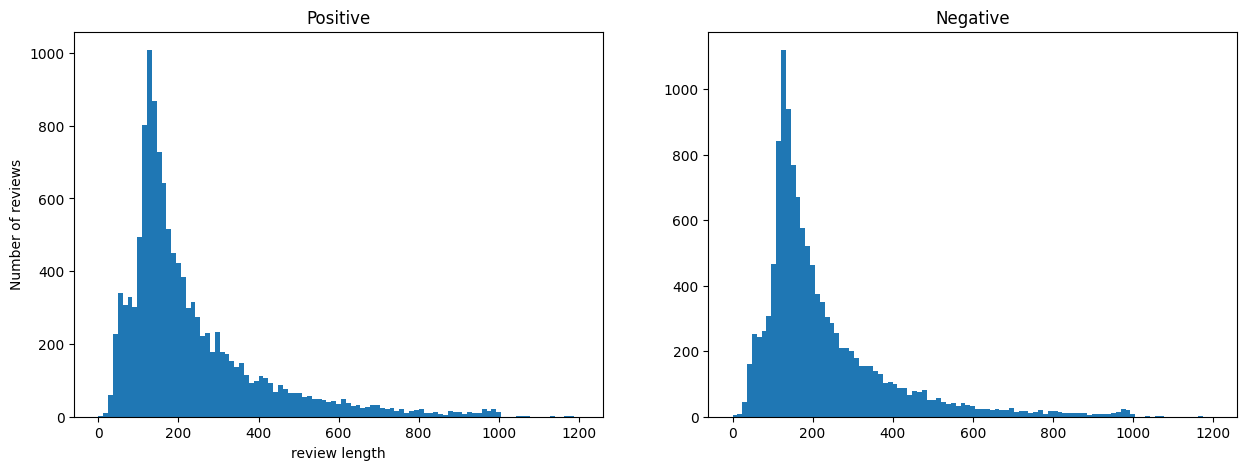

In [40]:
# Let's make some sample staistics
# Here we will calculate and plot the sentence length of x_train
# REMARK: Not sentence length but review length!

import math
import matplotlib.pylab as plt
import numpy as np

# Function for calculation of length and average length of samples
def avg_length(samples):
    length = [len(sample.split()) for sample in samples]
    return len(length), round(sum(length)/len(length),1), length

# Create list of positive and negative samples
positive = [s for i, s in enumerate(x_train_pre) if y_train[i]==1]
negative= [s for i, s in enumerate(x_train_pre) if y_train[i]==0]

# Calculate length and average length of each class
_, avg_positive, length_positive = avg_length(positive)
_, avg_negative, length_negative = avg_length(negative)
print("Average length positive {}\nAverage length negative: {}".format(avg_positive, avg_negative))

#Plot results
fig, ax = plt.subplots(1,2, figsize=(15,5))
bins = np.linspace(0, 1200, 100)
bins1 = np.linspace(0, 1200, 100)

ax[0].title.set_text('Positive')
ax[1].title.set_text('Negative')

ax[0].set_ylabel('Number of reviews')
ax[0].set_xlabel('review length')

ax[0].hist(length_positive, bins=bins)
ax[1].hist(length_negative, bins=bins1)
plt.plot()

In [41]:
# Do you notice something eye cathing in the above graphs and results?
# Can we use the sentence length to make a classification of positive vs. negative?

# REMARK: Does not look like it, they are very similar.

In [43]:
# Let's calculate the most common words

from collections import Counter
#Merge all samples to a single string
all_words = ' '.join(x_train_pre)
#Split using spaces
all_words = all_words.split()
# Pass all_words list to instance of Counter class.
Counter = Counter(all_words)
# Most_common() produces k frequently encountered input values and their respective counts.
most_occur = Counter.most_common(20)
print(most_occur)
print("Word count of 'fantastic': ", Counter['fantastic'])
print("Word count of 'awful':", Counter['awful'])

[('the', 333995), ('and', 162202), ('a', 161841), ('of', 145313), ('to', 135066), ('is', 106800), ('in', 93037), ('it', 77417), ('i', 75645), ('this', 75022), ('that', 69273), ('was', 48041), ('as', 46618), ('for', 43948), ('with', 43914), ('movie', 42052), ('but', 41731), ('film', 37775), ('on', 33567), ('not', 30187)]
Word count of 'fantastic':  779
Word count of 'awful': 1631


In [61]:
# Your turn!
# Calculate most occuring words for each class
## Remember that we added positive samples to the list 'positive' and negatives in the list 'negative' earlier which can be used here
# Do we see different distributions in negatively and positively charged words in the different classes?
# E.g., for each class, how many samples include the word 'fantastic'? What about 'terrible'? Experiment with a few words
# Can we use this for classification?
# If the most occuring words are similar in each class, we could use this as a way to define stop words (You don't have to do this now, it's just a consideration).
from collections import Counter

all_positive_words = ' '.join(positive)
all_positive_words = all_positive_words.split()
all_negative_words = ' '.join(negative)
all_negative_words = all_negative_words.split()
Counter_positive = Counter(all_positive_words)
Counter_negative = Counter(all_negative_words)

word_count = 5000

pos_word_count = Counter_positive.most_common(word_count)
neg_word_count = Counter_negative.most_common(word_count)

pos_set = {w for w, c in pos_word_count}
neg_set = {w for w,c in neg_word_count}
print("Most used word in positive reviews:", pos_word_count)
print("Most used word in negative reviews:", neg_word_count)

unique_pos = [(w, c) for (w, c) in pos_word_count if w not in neg_set]
unique_neg = [(w, c) for (w, c) in neg_word_count if w not in pos_set]
print("Unique positive words:", unique_pos[:25])
print("Unique negative words:", unique_neg[:25])

print("Word count of the word 'fantastic' in positive reviews:", Counter_positive['fantastic'])
print("Word count of the word 'awful' in positive reviews:", Counter_positive['awful'])
print("Word count of the word 'fantastic' in negative reviews:", Counter_negative['fantastic'])
print("Word count of the word 'awful' in negative reviews:", Counter_negative['awful'])




Most used word in positive reviews: [('the', 171883), ('and', 88762), ('a', 83065), ('of', 76585), ('to', 66405), ('is', 57001), ('in', 49716), ('it', 38577), ('i', 35526), ('this', 34699), ('that', 34039), ('as', 26135), ('with', 23154), ('for', 22271), ('was', 21850), ('but', 20404), ('film', 19768), ('movie', 18305), ('his', 17152), ('on', 16678), ('are', 14751), ('he', 14599), ('you', 14537), ('not', 14090), ('one', 13089), ('have', 12552), ('be', 12270), ('by', 11920), ('all', 11545), ('an', 11249), ('at', 11168), ('who', 10851), ('from', 10721), ('her', 10343), ('has', 9151), ('they', 9107), ('so', 8891), ('like', 8706), ("it's", 8443), ('very', 8263), ('about', 8259), ('out', 7795), ('or', 7550), ('more', 7472), ('good', 7414), ('when', 7406), ('some', 7396), ('what', 7298), ('if', 7167), ('just', 7082), ('she', 6919), ('there', 6700), ('story', 6512), ('my', 6445), ('great', 6296), ('which', 6169), ('their', 6093), ('time', 6090), ('see', 5851), ('up', 5795), ('well', 5626), ('

## Prepare data for input to neural network
 - 1\) Create word dictionary using Keras' tokenizer layer
 - 2\) Transform each sample to list of integers using the word dictionary
 - 3\) Pad all samples
 - 4\) Split into train and validation data

In [62]:
# Create word dictionary

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

max_words = 50000
# Use Keras tokenizer to split words into tokens using spaces and to build the word index
tokenizer = Tokenizer(num_words=max_words, filters='', lower=True, split=' ', oov_token=None)
                    # 'Num_words': Only consider max_words-1 most frequent words - the other words will get index=OOV_token. If oov_token=None: words not in top x are ignored.
                    # 'Filter': Keras also provides a simple way to filter (remove) special tokens but we've already taken care of the preprocessing. Well done :-)
                    # 'lower': If True, lowercases the text corpus
                    # 'split': We tokenize our corpus using spaces

# Fit on x_train_pre
tokenizer.fit_on_texts(x_train_pre) #Builds the word index
# Get word_index for inspection
word_index = tokenizer.word_index
print('Found {} unique tokens.'.format(len(word_index)))
print("Top x words in word_index dictionary:\n", list(word_index.items())[:5])

Found 137866 unique tokens.
Top x words in word_index dictionary:
 [('the', 1), ('and', 2), ('a', 3), ('of', 4), ('to', 5)]


In [63]:
# Transform each sample to list of integers using the word dictionary.

# Turn strings into lists of integers using Keras text_to_seq layer which uses the word index we created above
sequences = tokenizer.texts_to_sequences(x_train_pre)
#Padding and truncation: Define maximum length of input sample that we want to feed to the neural network (if sample is longer we'll truncate it)
maxlen = 250 # Is 150 okay? What should this be? What are the pros and cons?
# REMARK Looking at the plot, I would say at least 250 maybe 300
sequences = pad_sequences(sequences, maxlen=maxlen, padding='pre', truncating='pre') #Is it resonable to use 'pre' padding and truncation?
y_train = np.asarray(y_train)
print('Shape of samples:', sequences.shape)
print('Shape of labels:', y_train.shape)
print("\nOriginal sentence: {}\nSequence sentence: {}".format(x_train_pre[0], sequences[0]))

Shape of samples: (25000, 250)
Shape of labels: (25000,)

Original sentence: bromwell high is a cartoon comedy it ran at the same time as some other programs about school life such as teachers my 35 years in the teaching profession lead me to believe that bromwell high's satire is much closer to reality than is teachers the scramble to survive financially the insightful students who can see right through their pathetic teachers' pomp the pettiness of the whole situation all remind me of the schools i knew and their students when i saw the episode in which a student repeatedly tried to burn down the school i immediately recalled at high a classic line: inspector: i'm here to sack one of your teachers student: welcome to bromwell high i expect that many adults of my age think that bromwell high is far fetched what a pity that it isn't
Sequence sentence: [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0   

In [64]:
print("\nOriginal sentence: {}\nSequence sentence: {}".format(x_train_pre[568], sequences[568]))
print("\nOriginal sentence: {}\nSequence sentence: {}".format(x_train_pre[5688], sequences[5688]))


Original sentence: emma woodhouse gwyneth paltrow shakespeare in love duets has nothing to do with herself but painting going with her friends on her chariot up and down saying hello to people in town and trying to match make everybody she knows i guess there were no movies no television in those days and the girls had nothing to do but gossip i wish she had read a little more i like gwyneth and think that she is a lovely young woman she is talented and in emma one has the privilege to hear gwyneth sing i am looking forward to seeing duets where she is suppose to sing she is brave to speak british english with all those native britons including emma thompson's sister miss bates sophie thompson four weddings and a funeral dancing at lughnasa mrs elton juliet stevenson truly madly deeply was considered one of the most promising actors in 1991 gwyneth is part of the american movie royalty being none other than the daughter of director bruce paltrow st elsewhere and tony award winner blyt

In [65]:
# REMARK For at tjekke hvor mange procent vi dækker med 250. Det viser sig at være 70%
all_lengths = np.array(length_positive + length_negative)
print(np.percentile(all_lengths, [70,75,80, 90, 95]))

[249.  281.  321.  453.1 592. ]


In [72]:
# Shuffle the dataset
np.random.seed(1234)
indices = np.random.permutation(sequences.shape[0])
sequences_ = sequences[indices]
y_train_ = y_train[indices]

#Shuffle the preprocessed text data as well (in same order)
x_train_pre = np.asarray(x_train_pre)
x_train_pre = x_train_pre[indices]

In [73]:
print(x_train_pre[0])
print(y_train_[0])
print(x_train_pre[1])
print(y_train_[1])

this british film is truly awful and it's hard to believe that glenn ford is in it although he pretty much sleepwalks through it the idea of a bomb on a train sounds goodbut it turns out this train ends up parked for the majority of the film no action no movement just a static train the area where the train is parked is evacuated so it's not like there's any danger to anyone either in fact this film could be used in a film class to show how not to make a suspense film true suspense is generated by letting the audience know things that the characters don't a fact apparently unknown to the director spoiler: the train actually has two bombs on it but we are led to believe there is only one after the first bomb is defused it feels as if there is no longer a reason to watch the film any more but at the last minute the villain who has no apparent motivation for his actions reveals there are two nor are we certain when the bombs will go off so we don't even have a classic ticking bomb tension

In [75]:
# @title Standardtekst for titel
# Split samples into train and validation set
# How many samples do you want to train with and how many for evaluation - why?
# 20000/25000
training_samples = 20000
validation_samples = len(sequences_)-training_samples
x_train_seq = sequences_[:training_samples]
y_train_seq = y_train_[:training_samples]
x_val_seq = sequences_[training_samples: training_samples + validation_samples]
y_val_seq = y_train_[training_samples: training_samples + validation_samples]
print('Training samples:', len(x_train_seq))
print('Validation samples:', len(x_val_seq))
print(x_val_seq[0])

Training samples: 20000
Validation samples: 5000
[  181     7     1    94     4   179    25   421    19     5  1568    86
  2588    74   336     3  7006  5980     5  6685   185     2  6424     8
    12  2279 17380  4210   603  7685    50     8  1050 15312    81    75
     7     1    94     4   179   230    26     3 31297 33624    14   449
  1775 12233  2861 12113 20389   252  3754    30  5135  6360     7  3726
  6225  7825    18     4  7819   423    25  2686    60    40    23   160
    90 19303    72     2 22233     1  3533     2  4323    15     1  1341
     4     3   364     4 14174   102   220   211  1281     5  3572    14
     7    10 15391  1958    19  4767     2 13085   564     7  2708     1
    18  3174 43165  7115     4     3 16761 46360  4939    77     1   449
  1775     4     1   428     2  3562   974    30     1  3951  1558     2
    90 19595     5 14933     8   130     1  1558  3506     1  1324    76
  2538    44     4     1  2372     1  2037  1854  3182    40  1492   517
  

## Prepare pretrained word embeddings for Keras embedding layer
 - Which word embeddings do you want to work with? FastText, GloVe, other? Why?

In [76]:
# FastText word embeddings

#Downloads English Fasttext word embeddings
!pip install fasttext
import fasttext.util
from tqdm.notebook import tqdm
fasttext.util.download_model('en', if_exists='ignore')
#Load model
ft_model = fasttext.load_model('cc.en.300.bin')

embedding_dim=ft_model.get_dimension() #Get word embedding dimension

#Create our embedding matrix
embedding_matrix = np.zeros((max_words, embedding_dim))
print(embedding_matrix.shape)
for word, i in tqdm(word_index.items()):
    if i < max_words:
        embedding_matrix[i] = ft_model[word] #Add words to matrix
print("Are word embedding marix and word_index aligned?: {}".format(np.array_equal(ft_model['movie'], embedding_matrix[word_index['movie']])))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-3.0.1-py3-none-any.whl.metadata (10.0 kB)
Using cached pybind11-3.0.1-py3-none-any.whl (293 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp312-cp312-linux_x86_64.whl size=4498215 sha256=d26d4835165b24dba9e30b5c83cd00c38937c26cf1bdd41ea5eea2aaeef51f29
  Stored in directory: /root/.cache/pip/wheels/20/27/95/a7baf1b435f1cbde017cabdf1e9688526d2b0e929255a359c6
Successfully built fasttext

(50000, 300)


  0%|          | 0/137866 [00:00<?, ?it/s]

Are word embedding marix and word_index aligned?: True


In [90]:
print(len(embedding_matrix))
print(len(embedding_matrix[2]))
print(max_words)
print(embedding_dim)
print(maxlen)
print(len(x_train_seq))
print(len(x_train_seq))
print(len(y_val_seq))
print(len(y_val_seq))

50000
300
50000
300
250
20000
20000
5000
5000


In [ ]:
# REMARK: Sådan kan du gemme fasttext så du ikke næste gang skal download 4 Gb igen
# Forudsat at Drive er mountet:
# from google.colab import drive
# drive.mount('/content/drive')

#np.save("/content/drive/MyDrive/Colab Notebooks/embedding_matrix_fasttext.npy", embedding_matrix)


In [ ]:
# REMARK: Og så kan du bruge den direkte i dit embedding-lag:
#embedding_matrix = np.load("/content/drive/MyDrive/Colab Notebooks/embedding_matrix_fasttext.npy")
#print(embedding_matrix.shape)


In [ ]:
# GloVe word embeddings

# Download english embeddings from https://nlp.stanford.edu/projects/glove/
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

# Add directory of your word embeddings
glove_dir = r'C:\Users\jasp\Desktop\Deep learning course\glove.6B.100d.txt'
embeddings_index = {} #Dictionary for our word embeddings

#Load embeddings into dictionary
f = open(glove_dir, encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found {} word vectors.'.format(len(embeddings_index)))

#Preparing the GloVe word-embeddings matrix
embedding_dim=100
#Create our embedding matrix
embedding_matrix = np.zeros((max_words, embedding_dim))
oov_words=[]

for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector #Add words to matrix
        else:
            oov_words.append(word) #words not in vocab! They will get zero-vectors
print("\nnumber of OOV words: ", len(oov_words), "\nExamples:")
oov_words.sort()
print(oov_words[20:30])

In [ ]:
# Load embeddings using Gensim

#Gensim has the following pretrained models ready to load:
# 'conceptnet-numberbatch-17-06-300': ConceptNet Numberbatch consists of state-of-the-art semantic vectors
# 'fasttext-wiki-news-subwords-300': 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).
# 'glove-twitter-100': Pre-trained vectors based on  2B tweets, 27B tokens, 1.2M vocab, uncased.
# 'glove-twitter-200': Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased.
# 'glove-twitter-25': Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased.
# 'glove-twitter-50': Pre-trained vectors based on 2B tweets, 27B tokens, 1.2M vocab, uncased.
# 'glove-wiki-gigaword-100': Pre-trained vectors based on Wikipedia 2014 + Gigaword 5.6B tokens, 400K vocab, uncased.
# 'glove-wiki-gigaword-200': Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased.
# 'glove-wiki-gigaword-300': Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased.
# 'glove-wiki-gigaword-50': Pre-trained vectors based on Wikipedia 2014 + Gigaword, 5.6B tokens, 400K vocab, uncased.
# 'word2vec-google-news-300': Pre-trained vectors trained on a part of the Google News dataset (about 100 billion words). The model contains 300-dimensional vectors for 3 million words and phrases.
# 'word2vec-ruscorpora-300': Word2vec Continuous Skipgram vectors trained on full Russian National Corpus (about 250M words).

import gensim
from gensim.models.word2vec import Word2Vec
from gensim.test.utils import datapath
from gensim.models import KeyedVectors
from gensim.models.fasttext import load_facebook_model
import gensim.downloader as api
model = api.load("fasttext-wiki-news-subwords-300")
#Define embedding dimensions
embedding_dim=0
#Create our embedding matrix
embedding_matrix = np.zeros((max_words, embedding_dim))
oov_words=[]

for word, i in word_index.items():
    if i < max_words:
        if model.has_index_for(word):
            embedding_matrix[i] = model.get_vector(word) #Add words to matrix
        else:
            oov_words.append(word) #words not in vocab! They will get zero-vectors
print("\nnumber of OOV words: ", len(oov_words), "\nExamples:")
oov_words.sort()
print(oov_words[20:30])

## Train a classifier
 - How does the model performance change for:
 - GRU or LSTM vs. CNN
 - CNN: How many filters and which size should we use? You can also try using differet filter sizes in the same model (use the functional Keras API).
 - RNN: What should the hidden size be? Does it help to stack layers? Do you find any difference between LSTM and GRU
 - Random initialized word embeddings vs. pretrained?
 - There are many architectures and hyperparameters to explore - of course you can't explore all of them.

In [87]:
# **************** ORIGINAL UÆNDRET *****************
# Train model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, SimpleRNN, MaxPooling1D, Concatenate, Dense, Flatten, LSTM, GRU, Bidirectional, Dropout, GlobalMaxPooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Model, load_model

# Create a classifier using a CNN or RNN/LSTM/GRU
#RNN model
def build_model():
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim,
                        input_length=None,
                        weights=[embedding_matrix], #Delete 'weights=[embedding_matrix]' in order to train with random initialized word embeddings
                        trainable=False))

    ##Add layers here## https://keras.io/api/layers/#core-layers
    ##Add layers here##
    ##Add layers here##
    model.add(Dense(2, activation='softmax')) #Classification layer - you could also use a sigmoid activation if you prefer
    return model

#Build model
model = build_model()

# Set some training hyperparameters (Change them to whatever you prefer)
epochs = 1
batch_size= 1
learning_rate = 0.0005
opt = Adam(learning_rate=learning_rate, decay=1e-6)

#Compile
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["acc"])
history = model.fit(x_train_seq,
                    y_train_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_val_seq),
                    shuffle=True)

#Save model
model.save('IMDB_text_classifier.h5')  # creates a HDF5 file 'my_model.h5'

/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(1,), output.shape=(1, 250, 2)

In [100]:
results = {}

In [104]:
# Train LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, SimpleRNN, MaxPooling1D, Concatenate, Dense, Flatten, LSTM, GRU, Bidirectional, Dropout, GlobalMaxPooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Model, load_model

# Create a classifier using a CNN or RNN/LSTM/GRU
#RNN model
def build_lstm_model(name="lstm_sentiment_classifier"):
    model = Sequential(name=name)
    model.add(Embedding(max_words, embedding_dim,
                        input_length=maxlen,
                        weights=[embedding_matrix], #Delete 'weights=[embedding_matrix]' in order to train with random initialized word embeddings
                        trainable=False))

    model.add(LSTM(64, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) #Classification layer - you could also use a sigmoid activation if you prefer
    return model

#Build model
lstm_model = build_lstm_model()

# Set some training hyperparameters (Change them to whatever you prefer)
epochs = 3
batch_size= 32
learning_rate = 0.0005
opt = Adam(learning_rate=learning_rate, decay=1e-6)

#Compile
lstm_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["acc"])

history_lstm = lstm_model.fit(x_train_seq,
                    y_train_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_val_seq),
                    shuffle=True)

#Save model
results["LSTM"] = history_lstm.history
lstm_model.save('IMDB_lstm_classifier.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 177s 270ms/step - acc: 0.6654 - loss: 0.5940 - val_acc: 0.8096 - val_loss: 0.4209
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 181s 289ms/step - acc: 0.8046 - loss: 0.4335 - val_acc: 0.8210 - val_loss: 0.4030
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 264ms/step - acc: 0.8289 - loss: 0.3967 - val_acc: 0.8294 - val_loss: 0.3934


In [105]:
lstm_model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (32, 250, 300)         │    15,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (32, 64)               │        93,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,280,712 (58.29 MB)

 Trainable params: 93,570 (365.51 KB)

 Non-trainable params: 15,000,000 (57.22 MB)

 Optimizer params: 187,142 (731.03 KB)

In [106]:
# Train BLSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, SimpleRNN, MaxPooling1D, Concatenate, Dense, Flatten, LSTM, GRU, Bidirectional, Dropout, GlobalMaxPooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Model, load_model

# Create a classifier using a CNN or RNN/LSTM/GRU
#RNN model
def build_blstm_model(name="blstm_sentiment_classifier"):
    model = Sequential(name=name)
    model.add(Embedding(max_words, embedding_dim,
                        input_length=maxlen,
                        weights=[embedding_matrix], #Delete 'weights=[embedding_matrix]' in order to train with random initialized word embeddings
                        trainable=False))

    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) #Classification layer - you could also use a sigmoid activation if you prefer
    return model

#Build model
blstm_model = build_blstm_model()

# Set some training hyperparameters (Change them to whatever you prefer)
epochs = 3
batch_size= 32
learning_rate = 0.0005
opt = Adam(learning_rate=learning_rate, decay=1e-6)

#Compile
blstm_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["acc"])

history_blstm = blstm_model.fit(x_train_seq,
                    y_train_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_val_seq),
                    shuffle=True)

#Save model
results["BLSTM"] = history_blstm.history
blstm_model.save('IMDB_blstm_classifier.h5')  # creates a HDF5 file 'my_model.h5'

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 322s 508ms/step - acc: 0.6335 - loss: 0.6336 - val_acc: 0.7928 - val_loss: 0.4427
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 341s 545ms/step - acc: 0.8000 - loss: 0.4499 - val_acc: 0.8120 - val_loss: 0.4171
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 354s 501ms/step - acc: 0.8222 - loss: 0.4045 - val_acc: 0.8224 - val_loss: 0.3946


In [107]:
blstm_model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (32, 250, 300)         │    15,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (32, 128)              │       186,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 2)                │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,561,416 (59.36 MB)

 Trainable params: 187,138 (731.01 KB)

 Non-trainable params: 15,000,000 (57.22 MB)

 Optimizer params: 374,278 (1.43 MB)

In [109]:
# Train GRU model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, SimpleRNN, MaxPooling1D, Concatenate, Dense, Flatten, LSTM, GRU, Bidirectional, Dropout, GlobalMaxPooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Model, load_model

# Create a classifier using a CNN or RNN/LSTM/GRU
#RNN model
def build_gru_model(name="gru_sentiment_classifier"):
    model = Sequential(name=name)
    model.add(Embedding(max_words, embedding_dim,
                        input_length=maxlen,
                        weights=[embedding_matrix], #Delete 'weights=[embedding_matrix]' in order to train with random initialized word embeddings
                        trainable=False))

    model.add(GRU(64, return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) #Classification layer - you could also use a sigmoid activation if you prefer
    return model

#Build model
gru_model = build_gru_model()

# Set some training hyperparameters (Change them to whatever you prefer)
epochs = 3
batch_size= 32
learning_rate = 0.0005
opt = Adam(learning_rate=learning_rate, decay=1e-6)

#Compile
gru_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["acc"])
history_gru = gru_model.fit(x_train_seq,
                    y_train_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_val_seq),
                    shuffle=True)


results["GRU"] = history_gru.history

#Save model
gru_model.save('IMDB_gru_classifier.h5')  # creates a HDF5 file 'my_model.h5'

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 182s 287ms/step - acc: 0.6180 - loss: 0.6335 - val_acc: 0.8118 - val_loss: 0.4257
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 172s 275ms/step - acc: 0.8118 - loss: 0.4244 - val_acc: 0.8308 - val_loss: 0.3874
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 194s 262ms/step - acc: 0.8336 - loss: 0.3827 - val_acc: 0.8408 - val_loss: 0.3648


In [110]:
gru_model.summary()

Model: "gru_sentiment_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (32, 250, 300)         │    15,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (32, 64)               │        70,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 2)                │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,211,208 (58.03 MB)

 Trainable params: 70,402 (275.01 KB)

 Non-trainable params: 15,000,000 (57.22 MB)

 Optimizer params: 140,806 (550.03 KB)

In [111]:
# Train simpel 1D-CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, SimpleRNN, MaxPooling1D, Concatenate, Dense, Flatten, LSTM, GRU, Bidirectional, Dropout, GlobalMaxPooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Model, load_model

# Create a classifier using a CNN or RNN/LSTM/GRU
#RNN model
def build_cnn_model(name="simple_cnn_sentiment_classifier"):
    model = Sequential(name=name)
    model.add(Embedding(max_words, embedding_dim,
                        input_length=maxlen,
                        weights=[embedding_matrix], #Delete 'weights=[embedding_matrix]' in order to train with random initialized word embeddings
                        trainable=False))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(GlobalMaxPooling1D())
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax')) #Classification layer - you could also use a sigmoid activation if you prefer
    return model

#Build model
simple_cnn_model = build_cnn_model()

# Set some training hyperparameters (Change them to whatever you prefer)
epochs = 3
batch_size= 32
learning_rate = 0.0005
opt = Adam(learning_rate=learning_rate, decay=1e-6)

#Compile
simple_cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["acc"])
history_simple_cnn = simple_cnn_model.fit(x_train_seq,
                    y_train_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_val_seq),
                    shuffle=True)

results["SimpleCNN"] = history_simple_cnn.history

#Save model
simple_cnn_model.save('IMDB_simple_cnn_classifier.h5')  # creates a HDF5 file 'my_model.h5'

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 116ms/step - acc: 0.5930 - loss: 0.6817 - val_acc: 0.7544 - val_loss: 0.5145
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 120ms/step - acc: 0.7650 - loss: 0.5033 - val_acc: 0.8198 - val_loss: 0.4141
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - acc: 0.8150 - loss: 0.4143 - val_acc: 0.8454 - val_loss: 0.3651


In [112]:
simple_cnn_model.summary()

Model: "simple_cnn_sentiment_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (32, 250, 300)         │    15,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (32, 248, 128)         │       115,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_10         │ (32, 128)              │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 2)                │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,346,760 (58.54 MB)

 Trainable params: 115,586 (451.51 KB)

 Non-trainable params: 15,000,000 (57.22 MB)

 Optimizer params: 231,174 (903.03 KB)

In [113]:
# Train multifilter 1D-CNN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, SimpleRNN, MaxPooling1D, Concatenate, Dense, Flatten, LSTM, GRU, Bidirectional, Dropout, GlobalMaxPooling1D, MaxPooling1D, Conv1D
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.models import Model, load_model

# Create a classifier using a CNN or RNN/LSTM/GRU
#RNN model
def build_multifilter_cnn_model():
    inputs = Input(shape=(maxlen,), dtype='int32')

    x = Embedding(
        max_words,
        embedding_dim,
        input_length=maxlen,
        weights=[embedding_matrix], #Delete 'weights=[embedding_matrix]' in order to train with random initialized word embeddings
        trainable=False
        )(inputs)

    conv_3 = Conv1D(64, 3, activation='relu')(x)
    conv_3 = GlobalMaxPooling1D()(conv_3)

    conv_4 = Conv1D(64, 4, activation='relu')(x)
    conv_4 = GlobalMaxPooling1D()(conv_4)

    conv_5 = Conv1D(64, 5, activation='relu')(x)
    conv_5 = GlobalMaxPooling1D()(conv_5)

    concatenated = Concatenate()([conv_3, conv_4, conv_5])
    concatenated = Dropout(0.5)(concatenated)

    outputs = Dense(2, activation='softmax')(concatenated)

    model = Model(inputs, outputs, name="multifilter_cnn")
    return model



#Build model
multifilter_cnn_model = build_multifilter_cnn_model()

# Set some training hyperparameters (Change them to whatever you prefer)
epochs = 3
batch_size= 32
learning_rate = 0.0005
opt = Adam(learning_rate=learning_rate, decay=1e-6)

#Compile
multifilter_cnn_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["acc"])
history_multifilter_cnn = multifilter_cnn_model.fit(x_train_seq,
                    y_train_seq,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val_seq, y_val_seq),
                    shuffle=True)


results["MultifilterCNN"] = history_multifilter_cnn.history

#Save model
multifilter_cnn_model.save('IMDB_multifilter_cnn_classifier.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 162s 256ms/step - acc: 0.6021 - loss: 0.6694 - val_acc: 0.7852 - val_loss: 0.4917
Epoch 2/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 250ms/step - acc: 0.7926 - loss: 0.4677 - val_acc: 0.8312 - val_loss: 0.3930
Epoch 3/3
625/625 ━━━━━━━━━━━━━━━━━━━━ 153s 244ms/step - acc: 0.8447 - loss: 0.3690 - val_acc: 0.8494 - val_loss: 0.3502


In [114]:
multifilter_cnn_model.summary()

Model: "multifilter_cnn"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_15      │ (None, 250)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 250, 300)  │ 15,000,000 │ input_layer_15[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_11 (Conv1D)  │ (None, 248, 64)   │     57,664 │ embedding_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 247, 64)   │     76,864 │ embedding_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_13 (Conv1D)  │ (None, 246, 64)   │     96,064 │ embedding_15[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_11[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_12[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_max_pooling… │ (None, 64)        │          0 │ conv1d_13[0][0]   │
│ (GlobalMaxPooling1… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 192)       │          0 │ global_max_pooli… │
│ (Concatenate)       │                   │            │ global_max_pooli… │
│                     │                   │            │ global_max_pooli… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 192)       │          0 │ concatenate_3[0]… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 2)         │        386 │ dropout_13[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 15,692,936 (59.86 MB)

 Trainable params: 230,978 (902.26 KB)

 Non-trainable params: 15,000,000 (57.22 MB)

 Optimizer params: 461,958 (1.76 MB)

In [115]:
# Sammenligning af modelerne

for name, hist in results.items():
    best_val_acc = max(hist["val_acc"])
    print(f"{name}: best val_acc = {best_val_acc:.4f}")


LSTM: best val_acc = 0.8294
BLSTM: best val_acc = 0.8224
GRU: best val_acc = 0.8408
SimpleCNN: best val_acc = 0.8454
MultifilterCNN: best val_acc = 0.8494


### Plot training

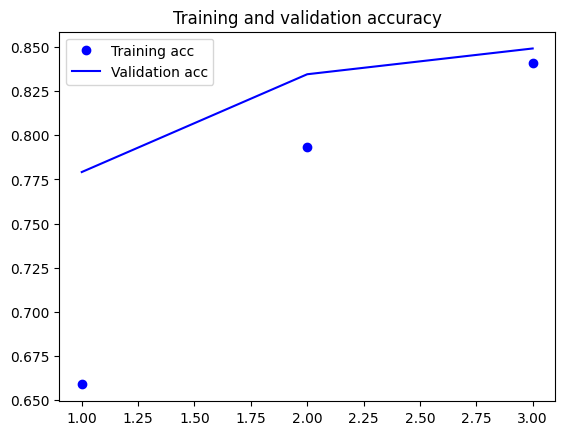

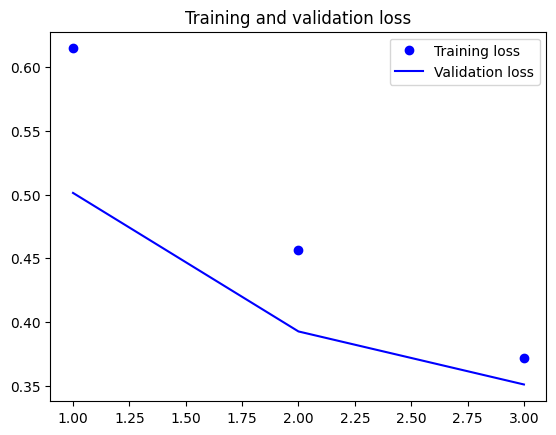

In [116]:
#Plotting results
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Test you classifier on the test set
 - We have not prepared x_test and y_test for test. That's now up to you :-)
 - When you have your result: Study the mistakes of the classifier - do you see a pattern? Could we have done something differently?
 - Maybe we could have done better using data augmentation?
 - Remember: Even though you find ways to improve your result, once you have tested your classifier on the test set and reported the result, you can't go back and change your classifier and report a better one. If you wan't to make changes to the classifier based on an analysis of the classifier, you should make the analysis using the validation dataset. You have the possibility to do this in your final report.

In [117]:
# Preprocess x_test using the regex you created for x_train
x_test_pre = [cleantext(x) for x in x_test]
print(x_test_pre[1])

x_test_pre = lowercase(x_test_pre)
print(x_test_pre[1])

#Turn strings into lists of integer indices using the word index
x_test_seq = tokenizer.texts_to_sequences(x_test_pre) #use 'tokenizer.texts_to_sequences()'
# Pad the text sequences
x_test_seq = pad_sequences(x_test_seq, maxlen=maxlen, padding='pre', truncating='pre') # use 'pad_sequences()'
#Convert y_test to numpy array
y_test = np.asarray(y_test)
print('Shape of data tensor:', x_test_seq.shape)
print('Shape of label tensor:', y_test.shape)
print("Original sentence: {}\nSequence sentence: {}".format(x_test_pre[0], x_test_seq[0]))
assert x_test_seq.shape[0] == y_test.shape[0]

Actor turned director Bill Paxton follows up his promising debut the Gothic-horror Frailty with this family friendly sports drama about the 1913 US Open where a young American caddy rises from his humble background to play against his Bristish idol in what was dubbed as The Greatest Game Ever Played I'm no fan of golf and these scrappy underdog sports flicks are a dime a dozen most recently done to grand effect with Miracle and Cinderella Man but some how this film was enthralling all the same The film starts with some creative opening credits imagine a Disneyfied version of the animated opening credits of HBO's Carnivale and Rome but lumbers along slowly for its first by-the-numbers hour Once the action moves to the US Open things pick up very well Paxton does a nice job and shows a knack for effective directorial flourishes I loved the rain-soaked montage of the action on day two of the open that propel the plot further or add some unexpected psychological depth to the proceedings Th

In [118]:
for name, model in [
    ("LSTM", lstm_model),
    ("GRU", gru_model),
    ("SimpleCNN", simple_cnn_model),
    ("MultiCNN", multifilter_cnn_model),
    ("BLSTM", blstm_model),
]:
    loss, acc = model.evaluate(x_test_seq, y_test, verbose=0)
    print(f"{name} – test loss: {loss:.4f}, test acc: {acc:.4f}")


LSTM – test loss: 0.3796, test acc: 0.8310
GRU – test loss: 0.3474, test acc: 0.8483
SimpleCNN – test loss: 0.3641, test acc: 0.8448
MultiCNN – test loss: 0.3427, test acc: 0.8534
BLSTM – test loss: 0.3808, test acc: 0.8294


In [ ]:
# Not Neseccary done above
# Use model.evaluate to get your test result
model_path = #add path to your saved model
model=load_model(model_path)
evaluate = model.evaluate(x, y) # '(x,y)' does not work - What should we use as argument to model.evaluate? https://www.tensorflow.org/api_docs/python/tf/keras/Model#evaluate
print("Accuracy", round(evaluate[1],3), "loss: ", round(evaluate[0],3))

In [120]:
# Den bedste model er multifilter_cnn_model så selvom de andre er listet nedenunder er det den vi bruger

In [119]:
# Print confussion matrix using sklearn

models = [lstm_model, gru_model, simple_cnn_model, multifilter_cnn_model, blstm_model]
model = multifilter_cnn_model

# We can get the softmax probabilities for each sample using model.predict()
predictions=model.predict(x_test_seq) #'(x)' does not work - What should we use as argument to model.predict? https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict

import sklearn
from sklearn.metrics import confusion_matrix

cm = sklearn.metrics.confusion_matrix(y_test, np.argmax(predictions, axis=1))
print(cm)
prec_rec_f1 = sklearn.metrics.precision_recall_fscore_support(y_test, np.argmax(predictions, axis=1), average='binary')
print("Precision:",round(prec_rec_f1[0],3),
      "Recall:",round(prec_rec_f1[1],3),
      "F1:",round(prec_rec_f1[2],3))

782/782 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step
[[10161  2339]
 [ 1326 11174]]
Precision: 0.827 Recall: 0.894 F1: 0.859


## Analyze the results of the classifier

In [121]:
# Print the false predictions and analyze: When does it make mistakes? Could we do more to help our classifier?
##  How confident is the classifier for false predictions?
def false_pos_neg(samples, labels, prediction):
    fp=[] #False positives
    fp_pred=[] # False positives predictions
    fn=[]
    fn_pred=[]
    for i in range(len(samples)):
        pred=np.argmax(prediction[i])
        if pred!=labels[i]:
            if pred==0:
                fn.append(str(predictions[i])+samples[i])
                fn_pred.append(list(predictions[i]))
            else:
                fp.append(str(predictions[i])+samples[i])
                fp_pred.append(list(predictions[i]))
    return fp, fp_pred, fn, fn_pred
fp, fp_pred, fn, fn_pred = false_pos_neg(x_test_pre, y_test, predictions)
print(fn[0], "\n\nAverage softmax scores for false positives: {}\nAverage softmax scores for false negatives: {}".format(np.average(fp_pred, axis=0), np.average(fn_pred, axis=0)))

[0.75674635 0.24325354]i felt this film did have many good qualities the cinematography was certainly different exposing the stage aspect of the set and story the original characters as actors was certainly an achievement and i felt most played quite convincingly of course they are playing themselves but definitely unique the cultural aspects may leave many disappointed as a familiarity with the chinese and oriental culture will answer a lot of questions regarding parent/child relationships and the stigma that goes with any drug use i found the jia hongsheng story interesting on a down note the story is in beijing and some of the fashion and music reek of early 90s even though this was made in 2001 so it's really cheesy sometimes the beatles crap etc whatever not a top ten or twenty but if it's on the television check it out 

Average softmax scores for false positives: [0.31900764 0.6809921 ]
Average softmax scores for false negatives: [0.6730565 0.3269431]


Average length false positive 229.7
Average length false negative: 257.0


[]

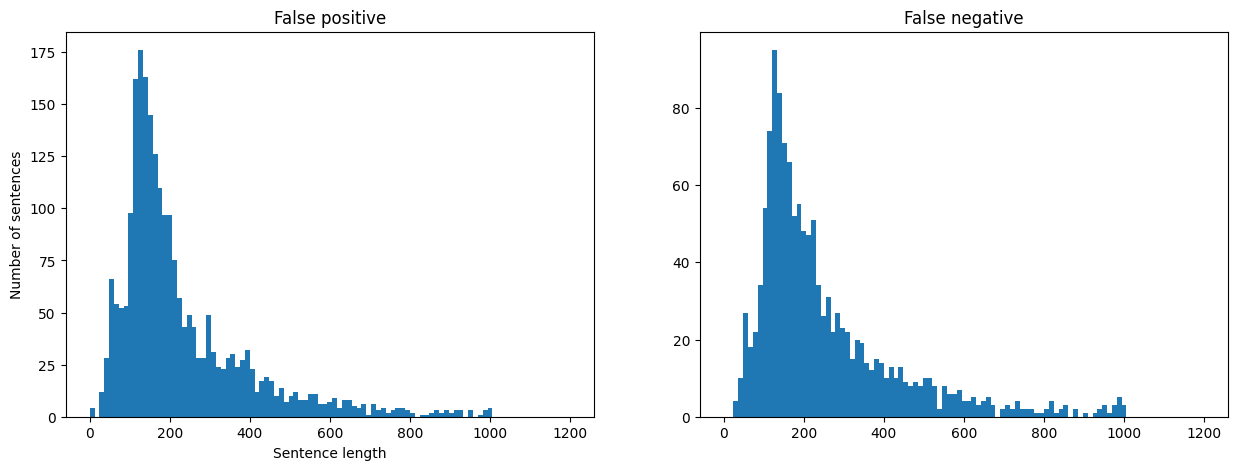

In [122]:
# If we have truncated the sentence at e.g. 150 words, it might be all the long sentences that we can't predict correctly?
# Calculate length and average length of each false prediction list (false_pos, false_neg)
_, avg_positive, length_positive = avg_length(fp)
_, avg_negative, length_negative = avg_length(fn)
print("Average length false positive {}\nAverage length false negative: {}".format(avg_positive, avg_negative))

#Plot results
fig, ax = plt.subplots(1,2, figsize=(15,5))
bins = np.linspace(0, 1200, 100)
bins1 = np.linspace(0, 1200, 100)

ax[0].title.set_text('False positive')
ax[1].title.set_text('False negative')

ax[0].set_ylabel('Number of sentences')
ax[0].set_xlabel('Sentence length')

ax[0].hist(length_positive, bins=bins)
ax[1].hist(length_negative, bins=bins1)
plt.plot()